# PRONTO Dataset

PRONTO is Multiphase FLow facility industrial dataset containing 31 variables corresponding to various sensors and valves of plant

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import stumpy
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("1_0912Testday4.csv")
df.head()

,Start Time,09/12/2017 10:00,End Time,9/12/2017 14:00:00 PM,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,NaN,FT305/OUT.CV,FT302/OUT.CV,FT305/AI2/OUT.CV,PT312/OUT.CV,FT102/OUT.CV,FT104/OUT.CV,FT102/AI3/OUT.CV,FT102/AI2/OUT.CV,PT417/OUT.CV,...,FIC302/PID1/PV.CV,FIC301/PID1/OUT.CV,FIC301/PID1/SP.CV,FIC301/PID1/PV.CV,FIC102/PID1/OUT.CV,FIC102/PID1/SP.CV,FIC102/PID1/PV.CV,FIC101/PID1/OUT.CV,FIC101/PID1/SP.CV,FIC101/PID1/PV.CV
1,TIMESTAMP,Air In1,Air In2,Air T,Air P,Water In1,Water In2,Water T,Water Density,Mixture zone P,...,NaN,NaN,Air In 2,Air In 2,Water In1,Water In1,NaN,Water In 2,Water In 2,NaN
2,09/12/2017 10:00,99.7911377,0.002018351,16.46453094,1.157050967,0.00014997,0.008798941,18.75638962,998.2576294,1.131950021,...,99.69100189,0,100.0009995,0.002018351,0,0,0.00014997,0,0,0.00879894
3,09/12/2017 10:00,99.84359741,0.00171826,16.46552086,1.157019019,0.000150975,0.008799082,18.75638962,998.2578125,1.131800056,...,99.74504089,0,100.0009995,0.00171826,0,0,0.000150975,0,0,0.00879908
4,09/12/2017 10:00,99.84837341,0.001418168,16.46649933,1.156985998,0.000151979,0.008799221,18.51082993,998.2579956,1.131649971,...,99.79908752,0,100.0009995,0.001418168,0,0,0.000151979,0,0,0.00879922


# Preprocessing

In [3]:
# Aligning the varible with proper labels and cnveritng to float
def prepare_df(df):
    columns = df.iloc[0]
    columns[0] = 'TIMESTAMP'
    df = df.drop([0,1],axis=0)
    df.columns = columns
    for i in df.columns[1:]:
        df[i] = df[i].astype('float')
    return df

In [4]:
#Dropping 'TIMESTAMP' for Calculation
df = prepare_df(df)
df = df.drop(['TIMESTAMP'],axis=1)
df.head()

,FT305/OUT.CV,FT302/OUT.CV,FT305/AI2/OUT.CV,PT312/OUT.CV,FT102/OUT.CV,FT104/OUT.CV,FT102/AI3/OUT.CV,FT102/AI2/OUT.CV,PT417/OUT.CV,PT408/OUT.CV,...,FIC302/PID1/PV.CV,FIC301/PID1/OUT.CV,FIC301/PID1/SP.CV,FIC301/PID1/PV.CV,FIC102/PID1/OUT.CV,FIC102/PID1/SP.CV,FIC102/PID1/PV.CV,FIC101/PID1/OUT.CV,FIC101/PID1/SP.CV,FIC101/PID1/PV.CV
2,99.791138,0.002018,16.464531,1.157051,0.000150,0.008799,18.75639,998.257629,1.131950,0.99217,...,99.691002,0.0,100.001,0.002018,0.0,0.0,0.000150,0.0,0.0,0.008799
3,99.843597,0.001718,16.465521,1.157019,0.000151,0.008799,18.75639,998.257812,1.131800,0.99217,...,99.745041,0.0,100.001,0.001718,0.0,0.0,0.000151,0.0,0.0,0.008799
4,99.848373,0.001418,16.466499,1.156986,0.000152,0.008799,18.51083,998.257996,1.131650,0.99217,...,99.799088,0.0,100.001,0.001418,0.0,0.0,0.000152,0.0,0.0,0.008799
5,99.824516,0.001118,16.467489,1.156954,0.000153,0.008799,18.51083,998.258179,1.131646,0.99217,...,99.853127,0.0,100.001,0.001118,0.0,0.0,0.000153,0.0,0.0,0.008799
6,99.772057,4.008060,16.468470,1.156922,0.000154,0.008800,18.51083,998.258301,1.131642,0.99217,...,99.797951,0.0,100.001,4.008060,0.0,0.0,0.000154,0.0,0.0,0.008800


# Multidimensional Matrix Profile

In [18]:
m = 500 
mps,ind = stumpy.mstump(df,m)

C:\Users\Jaivik\anaconda3\lib\site-packages\stumpy\core.py:443: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(welford_nanvar(a, w))


In [19]:
#Finding motif indices
n_idx = 1 #Selecting minimum value to identify primary motif
motifs_idx = np.argsort(mps, axis=1)[:, :n_idx]

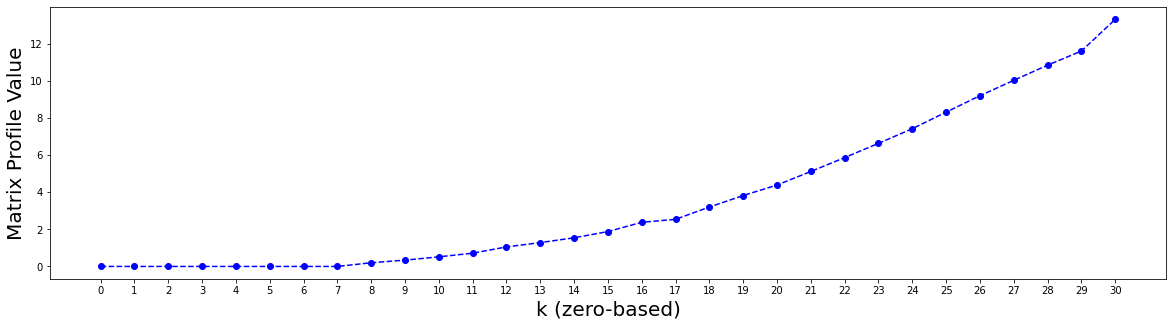

In [20]:
# Elbow Curve
f,ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(mps[range(mps.shape[0]), motifs_idx[:, 0]],'--bo')#, c='red', linewidth='4')
ax.set_xlabel('k (zero-based)', fontsize='20')
ax.set_ylabel('Matrix Profile Value', fontsize='20')
ax.set_xticks(range(mps.shape[0]))
ax.set_xticklabels(range(mps.shape[0]))
plt.show()

In [29]:
# 'k' variable from all 'd' variable
k = 7
S = stumpy.subspace(df, m, motifs_idx[k][0], ind[k][motifs_idx[k][0]], k)
print(f"For k = {k}, the {k+1}-dimensional subspace includes subsequences from variables/columns: {S}")

For k = 7, the 8-dimensional subspace includes subsequences from variables/columns: [12 17 20 22 23 25 29  7]


C:\Users\Jaivik\anaconda3\lib\site-packages\stumpy\core.py:443: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(welford_nanvar(a, w))


#### Plotting the motifs
Highlighted in Orange and Red are motifs and nearest neighbours respectively <br>
Final Graph in the plot is k-dimensional Matrix Profile <br>
Black dashed lines point towards the point corresponding to motif in k-dimensional Matrix Profile <br>

Text(0.5, 1.0, '8-dimensional Matrix Profile')

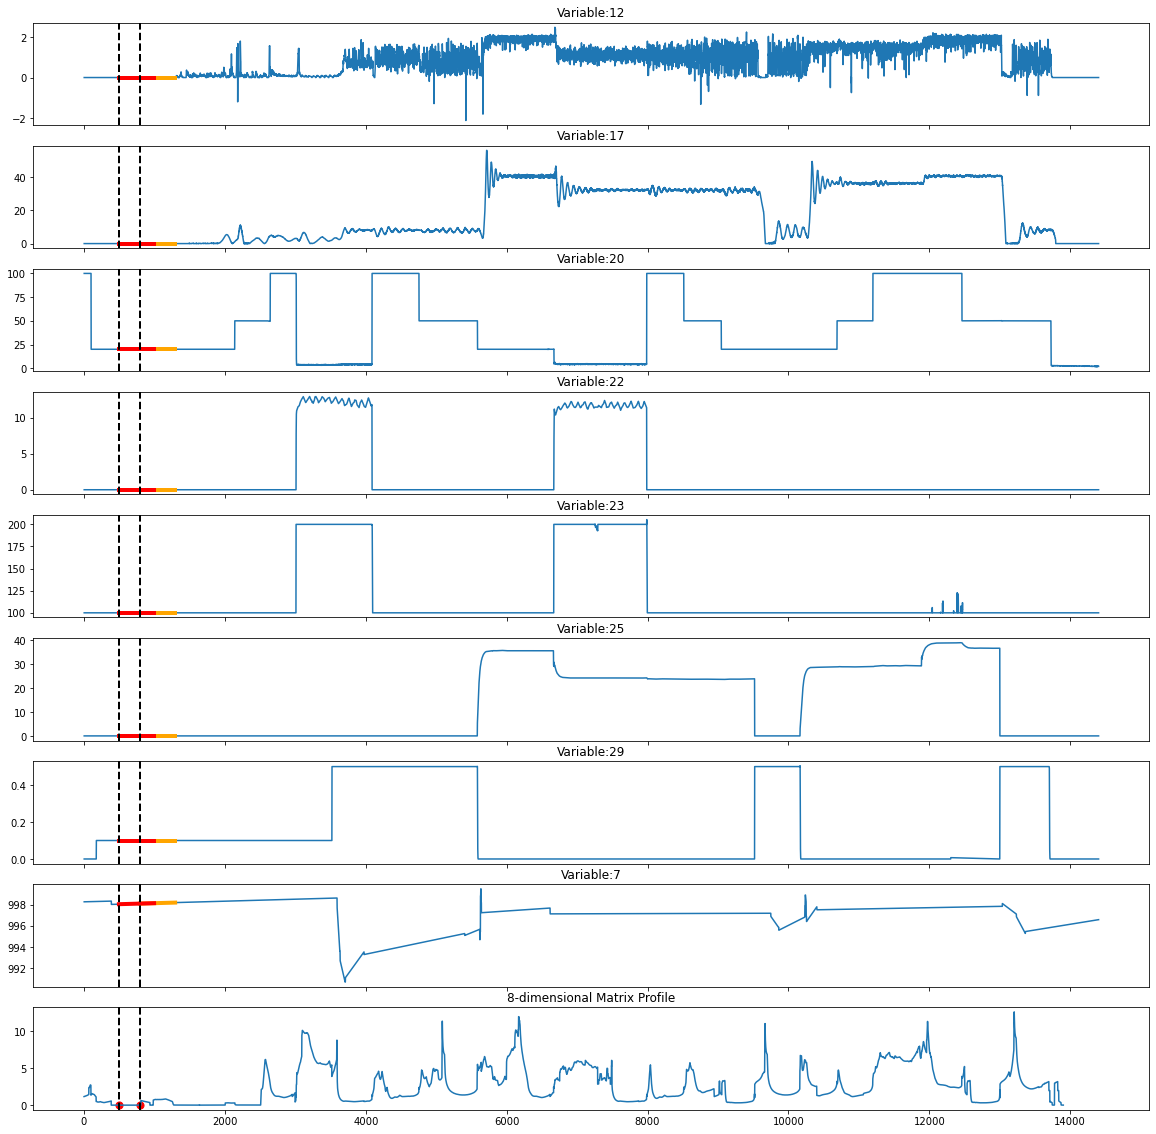

In [52]:
f,ax = plt.subplots(len(S)+1, 1, figsize=(20,20),sharex=True)
motif_idx = motifs_idx[k][0]
nearest_neighbor_idx = ind[k][motifs_idx[k][0]]
for i, s in enumerate(S):
    tmp = df[df.columns[s]]
    ax[i].plot(tmp)
    ax[i].set_title("Variable:{}".format(s))
    ax[i].plot(tmp[motif_idx : motif_idx + m], c='orange',linewidth=4)
    ax[i].plot(tmp[nearest_neighbor_idx : nearest_neighbor_idx + m], c='r',linewidth=4)
    ax[i].axvline(x=motif_idx,linestyle='dashed',c='k',linewidth=2)
    ax[i].axvline(x=nearest_neighbor_idx,linestyle='dashed',c='k',linewidth=2)
ax[len(S)].plot(mps[k])
ax[len(S)].axvline(x=motif_idx,linestyle='dashed',c='k',linewidth=2)
ax[len(S)].axvline(x=nearest_neighbor_idx,linestyle='dashed',c='k',linewidth=2)
ax[len(S)].scatter(nearest_neighbor_idx,mps[k][nearest_neighbor_idx],c='r',s=50)
ax[len(S)].scatter(motif_idx,mps[k][motif_idx],c='r',s=50)
ax[len(S)].set_title('{}-dimensional Matrix Profile'.format(k+1))

### Motifs from Individual/Univariate Matrix Profile

C:\Users\Jaivik\anaconda3\lib\site-packages\stumpy\core.py:443: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(welford_nanvar(a, w))
C:\Users\Jaivik\anaconda3\lib\site-packages\stumpy\core.py:443: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(welford_nanvar(a, w))
C:\Users\Jaivik\anaconda3\lib\site-packages\stumpy\core.py:443: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(welford_nanvar(a, w))
C:\Users\Jaivik\anaconda3\lib\site-packages\stumpy\core.py:443: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(welford_nanvar(a, w))
C:\Users\Jaivik\anaconda3\lib\site-packages\stumpy\core.py:443: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(welford_nanvar(a, w))
C:\Users\Jaivik\anaconda3\lib\site-packages\stumpy\core.py:443: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(welford_nanvar(a, w))
C:\Users\Jaivik\anaconda3\lib\site-packages\stumpy\core.py:443: RuntimeWarning: in

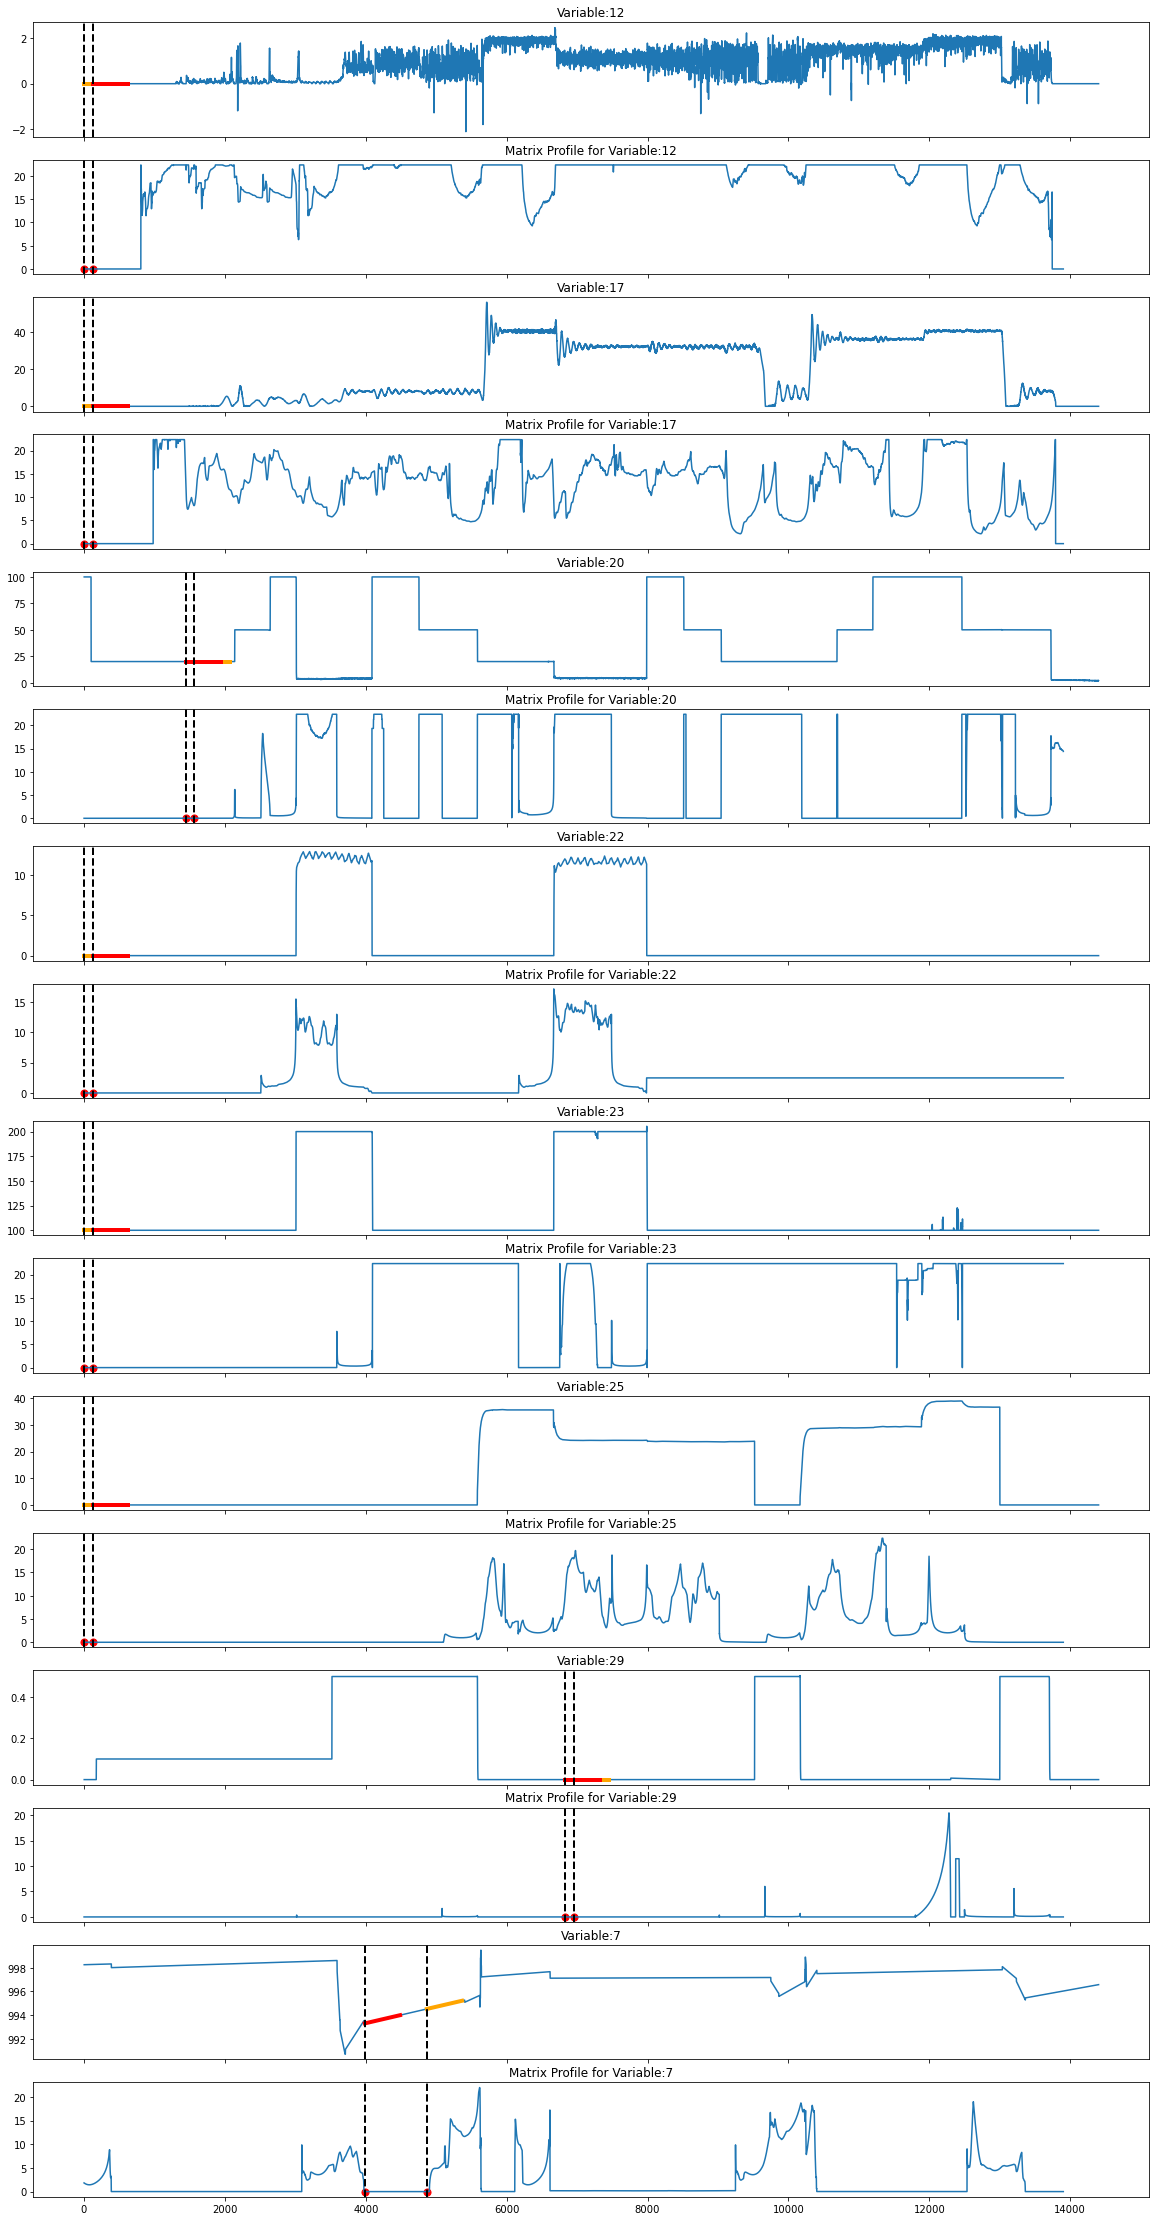

In [56]:
f,ax = plt.subplots(len(S)*2, 1, figsize=(20,40),sharex=True)
cnt=0
for i, s in enumerate(S):
    tmp = df[df.columns[s]]
    mp = stumpy.stump(tmp,m)
    mt_idx = np.argsort(mp[:,0])[:n_idx]
    ax[cnt].plot(tmp)
    ax[cnt].set_title("Variable:{}".format(s))
    ax[cnt + 1].plot(mp[:,0])
    ax[cnt + 1].set_title("Matrix Profile for Variable:{}".format(s))
    for j in range(n_idx):
        indx = mp[:,1][mt_idx[j]]
        ax[cnt].plot(tmp[mt_idx[j] : mt_idx[j] + m], c='orange',linewidth=4)
        ax[cnt].plot(tmp[indx : indx + m], c='r',linewidth=4)
        ax[cnt+1].scatter(mt_idx[j],mp[:,0][mt_idx[j]],c='r',s=50)
        ax[cnt+1].scatter(indx,mp[:,0][indx],c='r',s=50)
        for ik in range(2):
            ax[cnt+ik].axvline(x=mt_idx,linestyle='dashed',c='k',linewidth=2)
            ax[cnt+ik].axvline(x=indx,linestyle='dashed',c='k',linewidth=2)
    cnt+=2